<a href="https://colab.research.google.com/github/Anshita5/project/blob/main/naive_bayes_from_scratch_tumor_cls_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diagnosing a breast tumor as cancerous (Malignant) or not (Benign) correctly makes a big difference in life expectancy and quality of life of a patient. Misdiagnosis of a breast tumor can have drastic consequences on the medical condition of a patient. In many cases, quite frequently misdiagnosis of breast tumors happen in the presence of human intervention and medical experts. So, it means that sometimes even medical experts are not able to diagnose breast tumors correctly. Hence, it becomes very important to develop a Machine Learning based system which can diagnose breast tumors correctly at a very high rate, possibly even higher than medical experts. So, given a dataset of breast tumors we must develop a system which will learn to perform correct diagnosis of breast tumors from the same dataset.

#In order to solve this problem, we will using the Wisconsin Breast Cancer Tumor dataset to train a Naive Bayes Classifier from scratch without using scikit-learn, while also uncovering the mathematics behind it in brief, to classify the tumors as either Benign or Malignant and the evaluating it's performance.

#First, let's import the necessary libraries which we will be using here.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.shape

(569, 33)

In [ ]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data.drop(labels=data.columns[-1],axis=1,inplace=True)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.drop(labels="id",axis=1,inplace=True)

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data[data["diagnosis"] == 'M']

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [ ]:
training_data_len = int(0.7*data.shape[0])
testing_data_len = int(0.3*data.shape[0])

In [ ]:
training_data_len

398

In [ ]:
benign_class_data = data[data["diagnosis"] == 'B']
malignant_class_data = data[data["diagnosis"] == 'M']

In [ ]:
benign_class_training_data = benign_class_data.iloc[0:training_data_len//2]
benign_class_testing_data = benign_class_data.iloc[training_data_len//2:]

In [ ]:
benign_class_training_data.shape

(199, 31)

In [ ]:
benign_class_testing_data.shape

(158, 31)

In [ ]:
malignant_class_training_data = malignant_class_data.iloc[0:training_data_len//2]
malignant_class_testing_data = malignant_class_data.iloc[training_data_len//2:]

In [ ]:
malignant_class_training_data.shape

(199, 31)

In [ ]:
malignant_class_testing_data.shape

(13, 31)

In [ ]:
training_data = pd.concat([benign_class_training_data,
                           malignant_class_training_data],axis=0)

testing_data = pd.concat([benign_class_testing_data,
                         malignant_class_testing_data],axis=0)

In [ ]:
training_data.shape

(398, 31)

In [ ]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [ ]:
testing_data.shape

(171, 31)

In [ ]:
benign_class_mean_vector = np.array(benign_class_training_data.iloc[:,1:].mean())
benign_class_cov = np.array(benign_class_training_data.iloc[:,1:].cov())

malignant_class_mean_vector = np.array(malignant_class_training_data.iloc[:,1:].mean())
malignant_class_cov = np.array(malignant_class_training_data.iloc[:,1:].cov())

In [ ]:
np.linalg.det(benign_class_cov)

1.358256752304227e-76

In [ ]:
np.linalg.det(malignant_class_cov)

3.769993854018803e-65

In [ ]:
training_data_corr = training_data.iloc[:,1:].corr()

In [ ]:
training_data_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.423461,0.997694,0.987369,0.163584,0.503963,0.666143,0.819427,0.138864,-0.319635,...,0.965959,0.379369,0.962388,0.938114,0.133019,0.399732,0.512911,0.733373,0.142004,0.007183
texture_mean,0.423461,1.000000,0.430737,0.406719,0.075724,0.332135,0.374872,0.389672,0.126142,-0.050279,...,0.453145,0.905372,0.456969,0.429743,0.188699,0.360214,0.380656,0.408845,0.170121,0.186314
perimeter_mean,0.997694,0.430737,1.000000,0.986057,0.203135,0.556726,0.707207,0.849163,0.176434,-0.267187,...,0.965354,0.386399,0.967227,0.937632,0.164292,0.442629,0.550522,0.760646,0.167662,0.051014
area_mean,0.987369,0.406719,0.986057,1.000000,0.167526,0.489072,0.670129,0.813356,0.132800,-0.296827,...,0.956464,0.355407,0.953579,0.953814,0.127434,0.370314,0.493947,0.704323,0.112782,-0.005618
smoothness_mean,0.163584,0.075724,0.203135,0.167526,1.000000,0.658811,0.557233,0.566670,0.555629,0.577917,...,0.206653,0.130719,0.236436,0.196102,0.787594,0.504358,0.476919,0.510499,0.398470,0.521051
compactness_mean,0.503963,0.332135,0.556726,0.489072,0.658811,1.000000,0.890881,0.835291,0.616996,0.558726,...,0.530167,0.333853,0.584806,0.496415,0.555464,0.868557,0.823540,0.815929,0.517360,0.681613
concavity_mean,0.666143,0.374872,0.707207,0.670129,0.557233,0.890881,1.000000,0.919576,0.512700,0.360334,...,0.670765,0.357934,0.711359,0.652521,0.466058,0.742074,0.879514,0.850542,0.403292,0.513388
concave points_mean,0.819427,0.389672,0.849163,0.813356,0.566670,0.835291,0.919576,1.000000,0.468660,0.167426,...,0.821021,0.371817,0.848307,0.793424,0.457648,0.664058,0.751607,0.904517,0.364338,0.367768
symmetry_mean,0.138864,0.126142,0.176434,0.132800,0.555629,0.616996,0.512700,0.468660,1.000000,0.489576,...,0.171270,0.148791,0.208031,0.154208,0.398254,0.494374,0.453172,0.441145,0.709619,0.446551
fractal_dimension_mean,-0.319635,-0.050279,-0.267187,-0.296827,0.577917,0.558726,0.360334,0.167426,0.489576,1.000000,...,-0.259675,-0.013798,-0.212630,-0.245872,0.472144,0.478530,0.379967,0.181333,0.360897,0.762552


<Axes: >

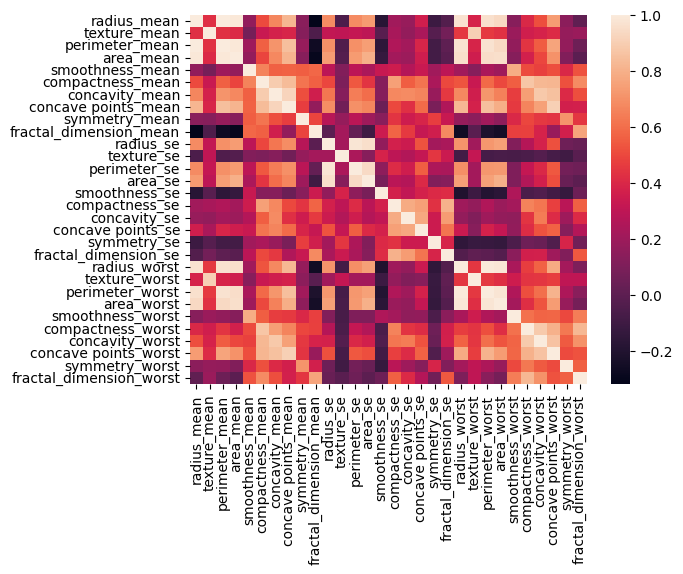

In [ ]:
sns.heatmap(training_data_corr,xticklabels=True,yticklabels=True)

In [ ]:
idx = np.argwhere((training_data_corr["radius_mean"] >= -0.2) & (training_data_corr["radius_mean"] <= 0.2))

In [ ]:
idx

array([[ 4],
       [ 8],
       [11],
       [14],
       [16],
       [18],
       [19],
       [24],
       [28],
       [29]])

In [ ]:
training_data_corr.index[idx[:,0]]

Index(['smoothness_mean', 'symmetry_mean', 'texture_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')